## Лабораторная 4
Датасет: Набор данных для анализа и прогнозирования сердечного приступа

In [2]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")
df = pd.read_csv(".//static//csv//heart_2020_cleaned.csv")
print(df.columns)
map_heart_disease_to_int = {'No': 0, 'Yes': 1}

df['Stroke'] = df['Stroke'].map(map_heart_disease_to_int).astype('int32')

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


## Классификация

### Бизнес цель 1: 
Предсказание сердечного приступа (Stroke) на основе других факторов.

Формируем выборки

In [3]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Stroke", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=9
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

HeartDisease    BMI Smoking AlcoholDrinking  Stroke  PhysicalHealth  \
203716           No  30.99      No              No       0             0.0   
139550           No  32.61      No              No       0             5.0   
314326           No  23.78      No              No       0             0.0   
79716            No  30.38      No              No       0             1.0   
23944           Yes  24.96      No              No       0             0.0   
...             ...    ...     ...             ...     ...             ...   
270558           No  25.84      No              No       0             0.0   
60811            No  29.84     Yes              No       0             0.0   
263613          Yes  32.92     Yes              No       0             0.0   
268192           No  37.42      No              No       0            30.0   
50387            No  32.78      No              No       0             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
203716           0.0          No  Female        70-74     White       No   
139550          10.0         Yes  Female        65-69     White      Yes   
314326           0.0          No  Female        55-59     Other       No   
79716           30.0         Yes  Female  80 or older     White       No   
23944            0.0         Yes  Female        75-79     White      Yes   
...              ...         ...     ...          ...       ...      ...   
270558           0.0          No    Male        65-69     White       No   
60811            3.0          No    Male        30-34     White       No   
263613           0.0         Yes  Female        50-54     White       No   
268192           0.0         Yes  Female        60-64  Hispanic      Yes   
50387            0.0          No  Female        70-74     Black      Yes   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
203716              Yes       Fair        6.0     No            No         No  
139550               No       Good        5.0    Yes            No         No  
314326              Yes  Very good        7.0     No            No         No  
79716                No       Good        7.0     No            No         No  
23944               Yes       Good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
270558               No  Very good        8.0     No            No         No  
60811               Yes  Excellent        6.0     No            No         No  
263613              Yes       Good        8.0     No            No         No  
268192               No       Poor        6.0     No            No         No  
50387               Yes  Very good       15.0     No            No         No  

[255836 rows x 18 columns]

'y_train'

Stroke
203716       0
139550       0
314326       0
79716        0
23944        0
...        ...
270558       0
60811        0
263613       0
268192       0
50387        0

[255836 rows x 1 columns]

'X_test'

HeartDisease    BMI Smoking AlcoholDrinking  Stroke  PhysicalHealth  \
86128            No  28.95      No              No       0             0.0   
29579           Yes  27.98      No              No       0             0.0   
9223            Yes  30.68      No              No       0             0.0   
221689           No  23.73      No              No       0             0.0   
42342           Yes  27.22      No              No       0             3.0   
...             ...    ...     ...             ...     ...             ...   
23906            No  29.57     Yes              No       0             7.0   
75618            No  24.28      No              No       0             0.0   
317847           No  27.96      No              No       0             0.0   
169637          Yes  35.78     Yes              No       0             3.0   
233255           No  32.69     Yes              No       0             0.0   

        MentalHealth DiffWalking     Sex AgeCategory      Race Diabetic  \
86128            0.0          No  Female       40-44     White       No   
29579            0.0          No    Male       60-64     White       No   
9223             0.0          No    Male       75-79     White      Yes   
221689           0.0          No    Male       65-69     White       No   
42342           14.0          No    Male       70-74     White       No   
...              ...         ...     ...         ...       ...      ...   
23906            2.0          No    Male       55-59     White       No   
75618            0.0          No  Female       40-44     White       No   
317847           0.0          No  Female       60-64  Hispanic       No   
169637           5.0          No  Female       75-79     White       No   
233255           0.0          No    Male       50-54     Black       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
86128               Yes       Good        7.0     No            No        Yes  
29579               Yes       Good        6.0    Yes            No         No  
9223                Yes  Very good        8.0     No            No         No  
221689              Yes  Excellent        8.0     No            No         No  
42342               Yes  Excellent        9.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
23906               Yes  Very good        7.0     No            No         No  
75618                No  Excellent        8.0     No            No         No  
317847               No       Good        6.0     No            No         No  
169637              Yes  Very good        7.0    Yes            No         No  
233255               No  Very good        7.0     No            No         No  

[63959 rows x 18 columns]

'y_test'

Stroke
86128        0
29579        0
9223         0
221689       0
42342        0
...        ...
23906        0
75618        0
317847       0
169637       0
233255       0

[63959 rows x 1 columns]

In [4]:
null_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)

Пропущенные значения по столбцам:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Статистический обзор данных:
                 BMI         Stroke  PhysicalHealth   MentalHealth  \
count  319795.000000  319795.000000    319795.00000  319795.000000   
mean       28.325399       0.037740         3.37171       3.898366   
std         6.356100       0.190567         7.95085       7.955235   
min        12.020000       0.000000         0.00000       0.000000   
25%        24.030000       0.000000         0.00000       0.000000   
50%        27.340000       0.000000         0.00000       0.000000   
75%        31.420000       0.000000  

Формируем конвеер для классификации данных и проверка конвеера

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

columns_to_drop = ['AgeCategory', 'Sex', 'Race']
num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype != "object"
]
cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)


pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

BMI    Stroke  PhysicalHealth  MentalHealth  SleepTime  \
203716  0.417528 -0.198038       -0.424855     -0.490470  -0.764158   
139550  0.671963 -0.198038        0.202871      0.765292  -1.461699   
314326 -0.714865 -0.198038       -0.424855     -0.490470  -0.066617   
79716   0.321722 -0.198038       -0.299310      3.276817  -0.066617   
23944  -0.529536 -0.198038       -0.424855     -0.490470   0.630924   
...          ...       ...             ...           ...        ...   
270558 -0.391324 -0.198038       -0.424855     -0.490470   0.630924   
60811   0.236911 -0.198038       -0.424855     -0.113741  -0.764158   
263613  0.720651 -0.198038       -0.424855     -0.490470   0.630924   
268192  1.427415 -0.198038        3.341502     -0.490470  -0.764158   
50387   0.698663 -0.198038       -0.424855     -0.490470   5.513713   

        HeartDisease_Yes  Smoking_Yes  AlcoholDrinking_Yes  DiffWalking_Yes  \
203716               0.0          0.0                  0.0              0.0   
139550               0.0          0.0                  0.0              1.0   
314326               0.0          0.0                  0.0              0.0   
79716                0.0          0.0                  0.0              1.0   
23944                1.0          0.0                  0.0              1.0   
...                  ...          ...                  ...              ...   
270558               0.0          0.0                  0.0              0.0   
60811                0.0          1.0                  0.0              0.0   
263613               1.0          1.0                  0.0              1.0   
268192               0.0          0.0                  0.0              1.0   
50387                0.0          0.0                  0.0              0.0   

        Diabetic_No, borderline diabetes  Diabetic_Yes  \
203716                               0.0           0.0   
139550                               0.0           1.0   
314326                               0.0           0.0   
79716                                0.0           0.0   
23944                                0.0           1.0   
...                                  ...           ...   
270558                               0.0           0.0   
60811                                0.0           0.0   
263613                               0.0           0.0   
268192                               0.0           1.0   
50387                                0.0           1.0   

        Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  GenHealth_Fair  \
203716                              0.0                   1.0             1.0   
139550                              0.0                   0.0             0.0   
314326                              0.0                   1.0             0.0   
79716                               0.0                   0.0             0.0   
23944                               0.0                   1.0             0.0   
...                                 ...                   ...             ...   
270558                              0.0                   0.0             0.0   
60811                               0.0                   1.0             0.0   
263613                              0.0                   1.0             0.0   
268192                              0.0                   0.0             0.0   
50387                               0.0                   1.0             0.0   

        GenHealth_Good  GenHealth_Poor  GenHealth_Very good  Asthma_Yes  \
203716             0.0             0.0                  0.0         0.0   
139550             1.0             0.0                  0.0         1.0   
314326             0.0             0.0                  1.0         0.0   
79716              1.0             0.0                  0.0         0.0   
23944              1.0             0.0                  0.0         0.0   
...                ...             ...                  ...         ...   
270558          

Формируем набор моделей

In [6]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree


class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=9)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=9
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=9,
        )
    },
}

Обучаем модели и тестируем их

In [7]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict, average=None)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict, average=None)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


Матрица неточностей

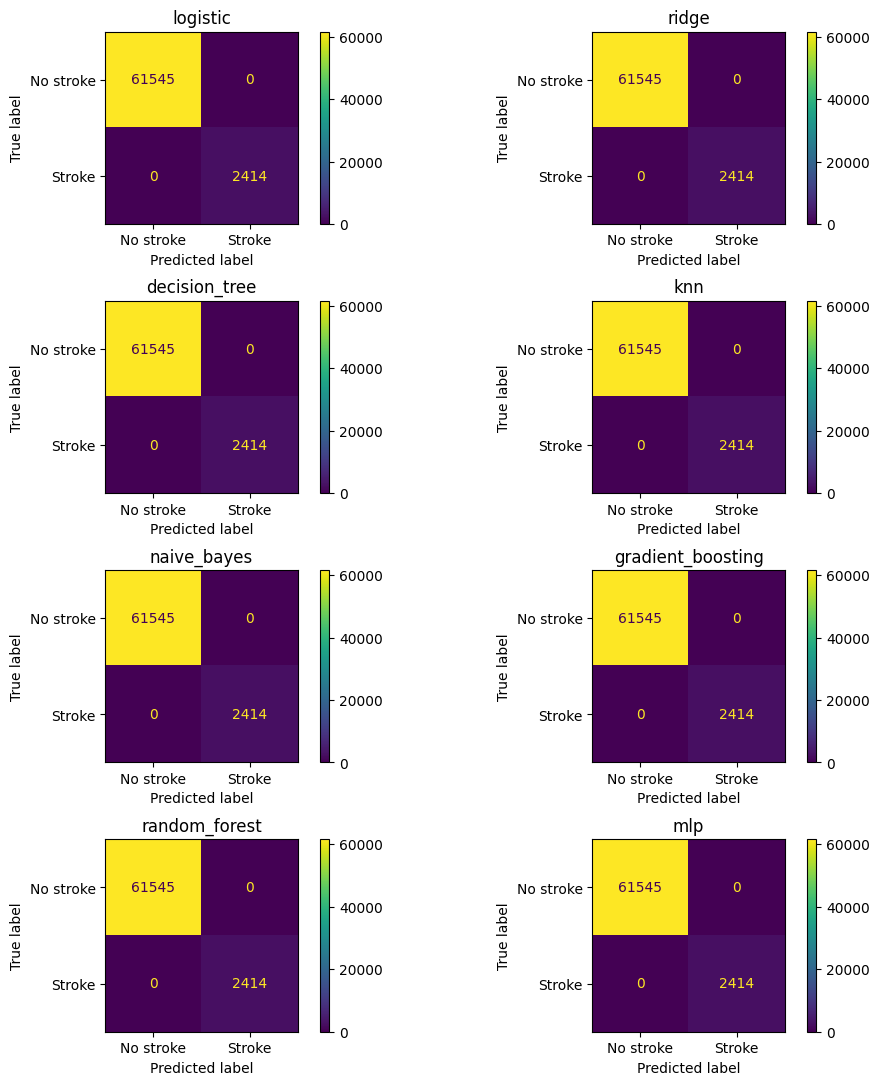

In [42]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["No stroke", "Stroke"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Точность, полнота, верность (аккуратность), F-мера

In [9]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
)

Precision_train  Precision_test  Recall_train  Recall_test  \
logistic                       1.0             1.0      1.000000          1.0   
ridge                          1.0             1.0      1.000000          1.0   
decision_tree                  1.0             1.0      1.000000          1.0   
knn                            1.0             1.0      1.000000          1.0   
naive_bayes                    1.0             1.0      1.000000          1.0   
gradient_boosting              1.0             1.0      1.000000          1.0   
random_forest                  1.0             1.0      1.000000          1.0   
mlp                            1.0             1.0      0.999896          1.0   

                   Accuracy_train  Accuracy_test  \
logistic                 1.000000            1.0   
ridge                    1.000000            1.0   
decision_tree            1.000000            1.0   
knn                      1.000000            1.0   
naive_bayes              1.000000            1.0   
gradient_boosting        1.000000            1.0   
random_forest            1.000000            1.0   
mlp                      0.999996            1.0   

                                                  F1_train     F1_test  
logistic                                        [1.0, 1.0]  [1.0, 1.0]  
ridge                                           [1.0, 1.0]  [1.0, 1.0]  
decision_tree                                   [1.0, 1.0]  [1.0, 1.0]  
knn                                             [1.0, 1.0]  [1.0, 1.0]  
naive_bayes                                     [1.0, 1.0]  [1.0, 1.0]  
gradient_boosting                               [1.0, 1.0]  [1.0, 1.0]  
random_forest                                   [1.0, 1.0]  [1.0, 1.0]  
mlp                [0.9999979689781726, 0.999948210678958]  [1.0, 1.0]

ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [10]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False)

Accuracy_test     F1_test  ROC_AUC_test  Cohen_kappa_test  \
logistic                     1.0  [1.0, 1.0]           1.0               1.0   
decision_tree                1.0  [1.0, 1.0]           1.0               1.0   
knn                          1.0  [1.0, 1.0]           1.0               1.0   
naive_bayes                  1.0  [1.0, 1.0]           1.0               1.0   
random_forest                1.0  [1.0, 1.0]           1.0               1.0   
gradient_boosting            1.0  [1.0, 1.0]           1.0               1.0   
mlp                          1.0  [1.0, 1.0]           1.0               1.0   
ridge                        1.0  [1.0, 1.0]           1.0               1.0   

                   MCC_test  
logistic                1.0  
decision_tree           1.0  
knn                     1.0  
naive_bayes             1.0  
random_forest           1.0  
gradient_boosting       1.0  
mlp                     1.0  
ridge                   1.0

Лучшая модель

In [11]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

Находим ошибки

In [12]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_new_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Stroke"] != y_new_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_new_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [HeartDisease, Predicted, BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer]
Index: []

Пример использования модели (конвейера) для предсказания

In [13]:
model = class_models[best_model]["pipeline"]

example_id = 8556
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

HeartDisease    BMI Smoking AlcoholDrinking Stroke PhysicalHealth  \
8556           No  38.41      No              No      1            0.0   

     MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
8556          0.0          No  Female       65-69  White       No   

     PhysicalActivity  GenHealth SleepTime Asthma KidneyDisease SkinCancer  
8556              Yes  Very good       6.0     No            No         No

BMI    Stroke  PhysicalHealth  MentalHealth  SleepTime  \
8556  1.582904  5.049532       -0.424855      -0.49047  -0.764158   

      HeartDisease_Yes  Smoking_Yes  AlcoholDrinking_Yes  DiffWalking_Yes  \
8556               0.0          0.0                  0.0              0.0   

      Diabetic_No, borderline diabetes  Diabetic_Yes  \
8556                               0.0           0.0   

      Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  GenHealth_Fair  \
8556                              0.0                   1.0             0.0   

      GenHealth_Good  GenHealth_Poor  GenHealth_Very good  Asthma_Yes  \
8556             0.0             0.0                  1.0         0.0   

      KidneyDisease_Yes  SkinCancer_Yes  
8556                0.0             0.0

'predicted: 1 (proba: [1.15647247e-04 9.99884353e-01])'

'real: 1'

Создаем гиперпараметры методом поиска по сетке

In [14]:
from sklearn.model_selection import GridSearchCV


optimized_model_type = 'random_forest'
random_state = 9

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_


c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 50}

Обучение модели с новыми гиперпараметрами

In [15]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=42,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=50,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели и сама оценка данных

In [16]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]

Precision_train Precision_test Recall_train Recall_test Accuracy_train  \
Name                                                                          
Old              1.0            1.0          1.0         1.0            1.0   
New              1.0            1.0          1.0         1.0            1.0   

     Accuracy_test    F1_train     F1_test  
Name                                        
Old            1.0  [1.0, 1.0]  [1.0, 1.0]  
New            1.0         1.0         1.0

In [17]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]

Accuracy_test     F1_test ROC_AUC_test Cohen_kappa_test MCC_test
Name                                                                 
Old            1.0  [1.0, 1.0]          1.0              1.0      1.0
New            1.0         1.0          1.0              1.0      1.0

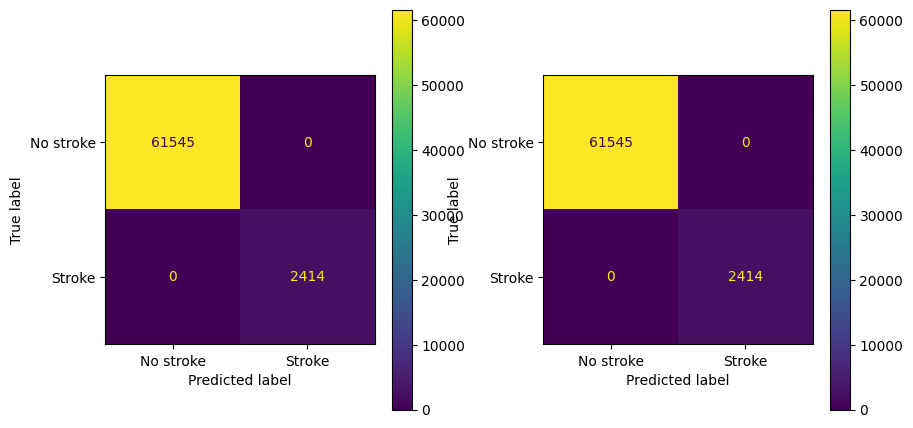

In [41]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["No stroke", "Stroke"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

Модель идеально классифицировала объекты, которые относятся к "No stroke" и "Stroke".

## Регрессия

### Бизнес цель 2: 
Предсказание среднего количества часов сна в день (SleepTime) на основе других факторов.

Формируем выборки

In [43]:
df = pd.read_csv(".//static//csv//heart_2020_cleaned.csv")

def split_into_train_test(
    df_input: DataFrame,
    target_colname: str,
    frac_train: float = 0.8,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    if target_colname not in df_input.columns:
        raise ValueError(f"{target_colname} is not a column in the DataFrame.")
    
    X = df_input.drop(columns=[target_colname])
    y = df_input[[target_colname]]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_into_train_test(
    df, 
    target_colname="SleepTime", 
    frac_train=0.8, 
    random_state=42
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
95877            No  23.33     Yes              No     No             0.0   
228939          Yes  27.46     Yes              No    Yes            30.0   
260256           No  32.69      No              No     No             2.0   
84785            No  31.32      No              No     No             0.0   
83845           Yes  24.63     Yes              No     No             2.0   
...             ...    ...     ...             ...    ...             ...   
119879           No  29.65      No              No     No             0.0   
259178           No  42.60     Yes              No     No             0.0   
131932           No  31.19     Yes              No     No            12.0   
146867           No  22.24      No              No     No             7.0   
121958           No  36.39     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race  \
95877            0.0          No    Male        75-79     White   
228939           0.0          No    Male        55-59     White   
260256           2.0          No    Male        50-54  Hispanic   
84785            0.0          No  Female        25-29     White   
83845           10.0          No    Male  80 or older     White   
...              ...         ...     ...          ...       ...   
119879           0.0          No    Male        60-64     White   
259178           5.0          No    Male        35-39     White   
131932           6.0          No    Male        65-69     White   
146867           5.0          No  Female        18-24     White   
121958           0.0          No  Female        30-34     Black   

                       Diabetic PhysicalActivity  GenHealth Asthma  \
95877                        No              Yes  Very good     No   
228939                       No              Yes       Good     No   
260256                       No               No  Very good     No   
84785                        No              Yes  Excellent     No   
83845                       Yes              Yes       Good     No   
...                         ...              ...        ...    ...   
119879                       No               No       Good     No   
259178                       No              Yes       Good     No   
131932  No, borderline diabetes               No  Very good     No   
146867                       No              Yes  Excellent     No   
121958                       No              Yes       Good    Yes   

       KidneyDisease SkinCancer  
95877             No         No  
228939            No         No  
260256            No         No  
84785             No         No  
83845             No         No  
...              ...        ...  
119879            No         No  
259178            No         No  
131932            No         No  
146867            No         No  
121958            No         No  

[255836 rows x 17 columns]

'y_train'

SleepTime
95877         7.0
228939        6.0
260256        8.0
84785         8.0
83845         7.0
...           ...
119879        8.0
259178        6.0
131932        8.0
146867        8.0
121958        8.0

[255836 rows x 1 columns]

'X_test'

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
271884           No  27.63     Yes              No     No             0.0   
270361           No  21.95      No              No     No             0.0   
219060           No  31.32     Yes              No     No             0.0   
24010            No  40.35      No              No     No            30.0   
181930           No  35.61     Yes              No     No            30.0   
...             ...    ...     ...             ...    ...             ...   
181387           No  28.06     Yes              No     No             0.0   
13791            No  29.68     Yes              No     No             7.0   
180164           No  21.11      No              No     No             4.0   
94526            No  23.99      No              No     No             0.0   
107129           No  31.87     Yes              No     No            30.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
271884          25.0          No  Female        25-29  Hispanic       No   
270361          20.0          No  Female        30-34     White       No   
219060           0.0          No  Female        40-44     White       No   
24010            0.0          No  Female        65-69     White       No   
181930          30.0         Yes  Female        60-64     White       No   
...              ...         ...     ...          ...       ...      ...   
181387          15.0          No    Male  80 or older     White       No   
13791           25.0          No    Male        35-39     Other       No   
180164           0.0          No  Female        35-39     White       No   
94526            0.0          No    Male        70-74     White       No   
107129           0.0         Yes    Male        60-64     White      Yes   

       PhysicalActivity  GenHealth Asthma KidneyDisease SkinCancer  
271884              Yes  Very good     No            No         No  
270361              Yes  Excellent     No            No        Yes  
219060              Yes  Very good    Yes            No         No  
24010                No       Good     No            No         No  
181930               No       Fair    Yes            No        Yes  
...                 ...        ...    ...           ...        ...  
181387              Yes  Very good     No            No        Yes  
13791                No  Excellent    Yes            No         No  
180164              Yes       Good     No            No        Yes  
94526               Yes  Excellent     No            No         No  
107129               No       Poor     No            No         No  

[63959 rows x 17 columns]

'y_test'

SleepTime
271884        7.0
270361        6.0
219060        6.0
24010         8.0
181930        4.0
...           ...
181387        7.0
13791         3.0
180164        7.0
94526         8.0
107129        7.0

[63959 rows x 1 columns]

Выполним one-hot encoding, чтобы избавиться от категориальных признаков

In [44]:
cat_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

X_test = pd.get_dummies(X_test, columns=cat_features, drop_first=True)
X_train = pd.get_dummies(X_train, columns=cat_features, drop_first=True)

X_test
X_train

BMI  PhysicalHealth  MentalHealth  HeartDisease_Yes  Smoking_Yes  \
95877   23.33             0.0           0.0             False         True   
228939  27.46            30.0           0.0              True         True   
260256  32.69             2.0           2.0             False        False   
84785   31.32             0.0           0.0             False        False   
83845   24.63             2.0          10.0              True         True   
...       ...             ...           ...               ...          ...   
119879  29.65             0.0           0.0             False        False   
259178  42.60             0.0           5.0             False         True   
131932  31.19            12.0           6.0             False         True   
146867  22.24             7.0           5.0             False        False   
121958  36.39             0.0           0.0             False         True   

        AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
95877                 False       False            False      True   
228939                False        True            False      True   
260256                False       False            False      True   
84785                 False       False            False     False   
83845                 False       False            False      True   
...                     ...         ...              ...       ...   
119879                False       False            False      True   
259178                False       False            False      True   
131932                False       False            False      True   
146867                False       False            False     False   
121958                False       False            False     False   

        AgeCategory_25-29  ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  \
95877               False  ...         False                            False   
228939              False  ...         False                            False   
260256              False  ...         False                            False   
84785                True  ...         False                            False   
83845               False  ...          True                            False   
...                   ...  ...           ...                              ...   
119879              False  ...         False                            False   
259178              False  ...         False                            False   
131932              False  ...         False                            False   
146867              False  ...         False                            False   
121958              False  ...         False                            False   

        PhysicalActivity_Yes  GenHealth_Fair  GenHealth_Good  GenHealth_Poor  \
95877                   True           False           False           False   
228939                  True           False            True           False   
260256                 False           False           False           False   
84785                   True           False           False           False   
83845                   True           False            True           False   
...                      ...             ...             ...             ...   
119879                 False           False            True           False   
259178                  True           False            True           False   
131932                 False           False           False           False   
146867                  True           False           False           False   
121958                  True           False            True           False   

        GenHealth_Very good  Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
95877                  True       False              False           False  
228939                False       False              False           False  
260256                 True       False              False         

Определение перечня алгоритмов решения задачи регрессии

In [45]:
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
    "mlp": {
        "model": neural_network.MLPRegressor(
            activation="tanh",
            hidden_layer_sizes=(3),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

for model_name in models.keys():
    print(f"Model: {model_name}")

    fitted_model = models[model_name]["model"].fit(
        X_train.values, y_train.values.ravel()
    )
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred
    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

Model: linear
Model: linear_poly
Model: linear_interact
Model: ridge
Model: decision_tree
Model: knn
Model: random_forest
Model: mlp


Выводим результаты оценки

In [46]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

Выводим лучшую модель

In [47]:
best_model = str(reg_metrics.sort_values(by="RMSE_test").iloc[0].name)

display(best_model)

'linear_poly'

Подбираем гиперпараметры методом поиска по сетке

In [48]:
from sklearn.ensemble import RandomForestRegressor


X = df[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking',
       'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']]
y = df['SleepTime'] 

model = RandomForestRegressor() 

param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [10, 20],  
    'min_samples_split': [5, 10]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Лучший результат (MSE): 1.9790374490880065


Обучаем модель с новыми гиперпараметрами и сравниваем новых данных со старыми

In [49]:
# Old data

old_param_grid = param_grid
old_grid_search = grid_search
old_grid_search.fit(X_train, y_train)

old_best_params = old_grid_search.best_params_
old_best_mse = -old_grid_search.best_score_ 

# New data

new_param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [5]
    }
new_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

new_grid_search.fit(X_train, y_train)

new_best_params = new_grid_search.best_params_
new_best_mse = -new_grid_search.best_score_

new_best_model = RandomForestRegressor(**new_best_params)
new_best_model.fit(X_train, y_train)

old_best_model = RandomForestRegressor(**old_best_params)
old_best_model.fit(X_train, y_train)

y_new_pred = new_best_model.predict(X_test)
y_old_pred = old_best_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_new_pred)
rmse = np.sqrt(mse)

print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\Desktop\aim\aimvenv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Старые параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Лучший результат (MSE) на старых параметрах: 1.9789879323889759

Новые параметры: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Лучший результат (MSE) на новых параметрах: 1.9835849471109568
Среднеквадратическая ошибка (MSE) на тестовых данных: 2.005535804883726
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 1.416169412494044


Визуализация данных

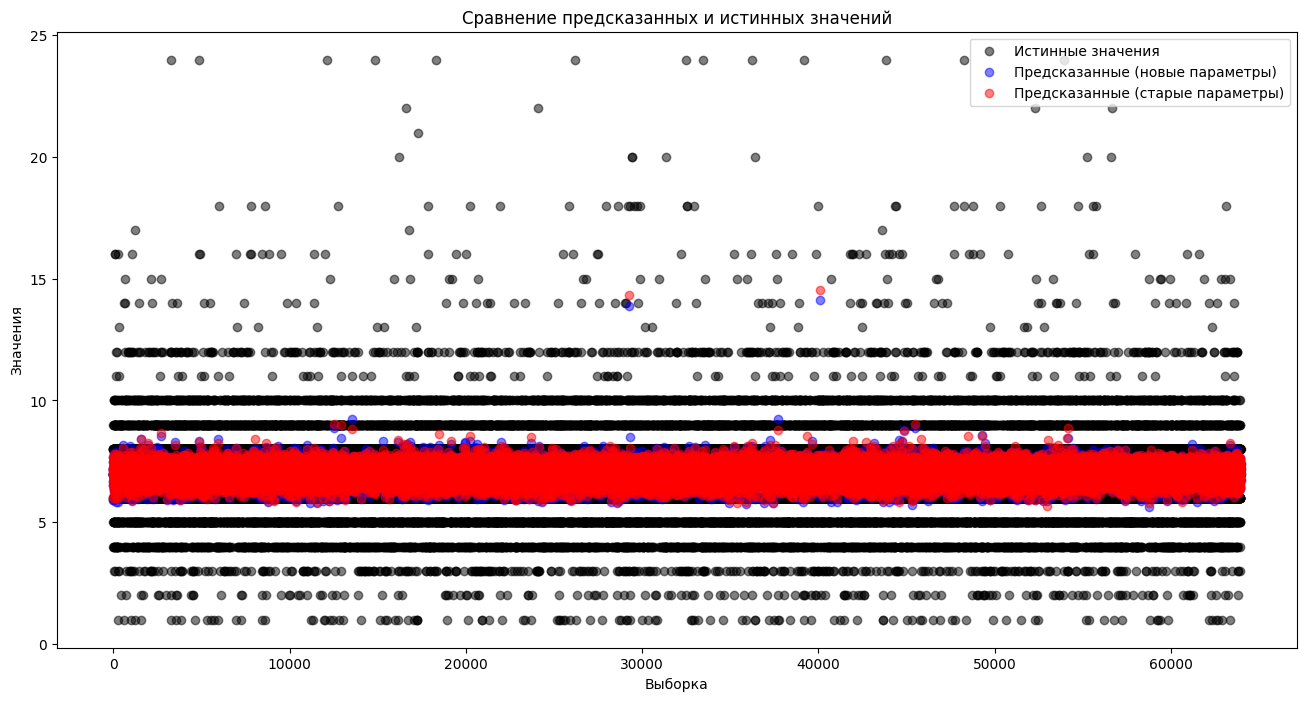

In [54]:
plt.figure(figsize=(16, 8))
plt.scatter(range(len(y_test)), y_test, label="Истинные значения", color="black", alpha=0.5)
plt.scatter(range(len(y_test)), y_new_pred, label="Предсказанные (новые параметры)", color="blue", alpha=0.5)
plt.scatter(range(len(y_test)), y_old_pred, label="Предсказанные (старые параметры)", color="red", alpha=0.5)
plt.xlabel("Выборка")
plt.ylabel("Значения")
plt.legend()
plt.title("Сравнение предсказанных и истинных значений")
plt.show()